# Count Data  
## Initialising R  
In this lesson we will be exploring the cars database that will be used in your A-level.
We will be using a powerful programming language called *R*.
To run code in *R*:  
1. Click on the box containing code to highlight it in green.
2. Click on the play button above to show the output.

#### **Exercise 1**  
Load the data and settings by running the code below. If you do this successfully you should get a message in the output.

In [8]:
library(tidyverse)
library(readr)

options(repr.plot.width=8,
        repr.plot.height=4,
        warn=-1)

clean_theme <- theme_bw(base_size=12, base_family="sans") + 
  theme(panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.text = element_text(size = 12),
        legend.title = element_text(size=12),
        axis.line = element_line(size = 0.5, colour = "black"),
        axis.title = element_text(face = "plain"),
        strip.background = element_blank()
  )

clean_theme_hist <- theme_bw(base_size=12, base_family="sans") + 
  theme(panel.border = element_blank(), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        legend.text = element_text(size = 12),
        legend.title = element_text(size=12),
        axis.line = element_line(size = 0.5, colour = "black"),
        axis.title = element_text(face = "plain"),
        strip.background = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
  )

car_df <-
  read_csv("cars_data.csv")

car_data <-
  car_df %>%
  mutate(YearRegistered = as.factor(YearRegistered),
         GovRegion = as.factor(GovRegion),
         PropulsionTypeId = as.factor(ifelse(PropulsionTypeId == 1, "Petrol",
                                   ifelse(PropulsionTypeId == 2, "Diesel",
                                          ifelse(PropulsionTypeId == 3, "Electric",
                                                 ifelse(PropulsionTypeId == 7, "Gas/Petrol",
                                                        ifelse(PropulsionTypeId == 8, "Electric/Petrol", NA)))))),
         BodyTypeId = as.factor(ifelse(BodyTypeId == 1, "2 door saloon",
                             ifelse(BodyTypeId == 2, "4 door saloon",
                                    ifelse(BodyTypeId == 3, "saloon",
                                           ifelse(BodyTypeId == 4, "convertible",
                                                  ifelse(BodyTypeId == 5, "coupe",
                                                         ifelse(BodyTypeId == 6, "estate",
                                                                ifelse(BodyTypeId == 13, "3 door hatchback",
                                                                       ifelse(BodyTypeId == 14, "5 door hatchback",
                                                                              ifelse(BodyTypeId == 96, "Multi Purpose Vehicle", NA)))))))))),
         KeeperTitleId = as.factor(ifelse(KeeperTitleId == 1, "Male",
                                ifelse(KeeperTitleId == 2, "Female",
                                       ifelse(KeeperTitleId == 3, "(not used)",
                                              ifelse(KeeperTitleId == 4, "unknown (Dr, Rev, etc.)",
                                                     ifelse(KeeperTitleId == 5, "company", NA)))))),
         Make = as.factor(Make))
print("Ready to rumble")

Parsed with column specification:
cols(
  ReferenceNumber = col_double(),
  Make = col_character(),
  PropulsionTypeId = col_double(),
  BodyTypeId = col_double(),
  GovRegion = col_character(),
  KeeperTitleId = col_double(),
  EngineSize = col_double(),
  YearRegistered = col_double(),
  Mass = col_double(),
  CO2 = col_double(),
  CO = col_double(),
  NOX = col_double(),
  part = col_double(),
  hc = col_double(),
  `Random number` = col_double()
)


[1] "Ready to rumble"


## Inspecting the data

Each row is a single entry (car) and each column contains a particular variable.
Recall, for the **car_data** dataset the variables are as follows:  

* *Reference number*: a unique identifier
* *Make*:             the car manufacturer
* *PropulsionTypeId*: a code for the type of fuel (e.g. petrol, diesel...)
* *BodyTypeId*:       a code for the type of body (e.g. convertable, estate, coupe... )
* *GovRegion*:        where the registered keeper lives
* *EngineSize*:       capacity of engine (cubic cm)
* *YearRegistered*:   the year in which the vehicle was first registered
* *Mass*:             the mass of the vehicle in Kg + 75 (the average person)
* *CO2*:              carbon dioxide emissions (g/km)
* *CO*:               carbon monoxide emissions (g/km)
* *NOX*:              oxides of nitrogen emissions (g/km)
* *part*: particulate emissions (g/km) DIESEL ONLY
* *hc*: hydrocarbon emissions (g/km)
* Random number: a random number betwen 0 and 1 to assist with sampling  

The **head()** function returns the first six rows (cars) of the dataset we feed to it.
To feed a dataset to a function we use the **%>%** symbol. For example:

```
dataset %>%
head()
```

#### **Exercise 2**  
Display the first 6 cars in the *car_data* database

In [4]:
car_data %>%
head()

ReferenceNumber,Make,PropulsionTypeId,BodyTypeId,GovRegion,KeeperTitleId,EngineSize,YearRegistered,Mass,CO2,CO,NOX,part,hc,Random number
<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
440,VAUXHALL,Petrol,Multi Purpose Vehicle,London,Male,1598,2002,1970,190,0.219,0.026,NA,0.037,0.2794350
1465,VAUXHALL,Petrol,5 door hatchback,South West,company,1398,2016,1163,118,0.463,0.010,NA,0.031,0.2144179
3434,VOLKSWAGEN,Petrol,5 door hatchback,South West,Female,1395,2016,1316,113,0.242,0.033,NA,0.048,0.9800254
1801,VAUXHALL,Petrol,5 door hatchback,South West,"unknown (Dr, Rev, etc.)",1598,2016,1355,159,0.809,0.012,NA,0.051,0.2865567
2330,BMW,Diesel,3 door hatchback,South West,company,1995,2016,1445,114,0.180,0.023,NA,NA,0.2646628
2216,FORD,Diesel,estate,South West,company,1499,2016,1425,98,0.354,0.074,NA,NA,0.6902468


## Comparing counts
Remember, we can summarise each variable using the **summary()** function to display descriptive statistics:  
```
... %>%
summary()
```

For categorical variables, this will display each of the groups with the total number of observations(cars) in each group:
* GROUP 1: number of cars in GROUP 1
* GROUP 2: number of cars in GROUP 2
* .  
* .  
* .  
* GROUP n: number of cars in GROUP n
#### **Exercise 3**  
Display summary statistics for the variables in the *car_data* database  
#### **Questions**
1) Which year had the most cars registered?
2) What is the most popular car manufacturer? and the least?

In [6]:
car_data %>% 
summary()

 ReferenceNumber          Make             PropulsionTypeId
 Min.   :   1.0   BMW       : 551   Diesel         :1396   
 1st Qu.: 957.5   FORD      :1089   Electric       :   1   
 Median :1914.0   TOYOTA    : 275   Electric/Petrol: 118   
 Mean   :1914.0   VAUXHALL  :1069   Gas/Petrol     :   1   
 3rd Qu.:2870.5   VOLKSWAGEN: 843   Petrol         :2311   
 Max.   :3827.0                                            
                                                           
                 BodyTypeId        GovRegion                    KeeperTitleId 
 5 door hatchback     :2091   London    : 998   company                :1351  
 3 door hatchback     : 475   North West:1164   Female                 : 878  
 estate               : 454   South West:1665   Male                   :1481  
 Multi Purpose Vehicle: 352                     unknown (Dr, Rev, etc.): 117  
 4 door saloon        : 225                                                   
 coupe                : 141                   

## Visualising total counts - Bar charts 1  
Bar charts allow us to compare the total number of observations in each group of a categorical variable:
1) Feed the data to our **ggplot()** function using **%>%**
2) Specify **x =** the **categorical variable** whose groups we wish to compare
3) Specify options to make the chart look nice

```
dataset %>%
    ggplot(aes(x = categorical variable))+
    geom_bar(options)+
    more_options
```

#### **Exercise 4**  
Visualise a comparison between the total number of cars registered in 2002 and 2016  
#### **Question**
Can you think of any reasons for the trend you see?

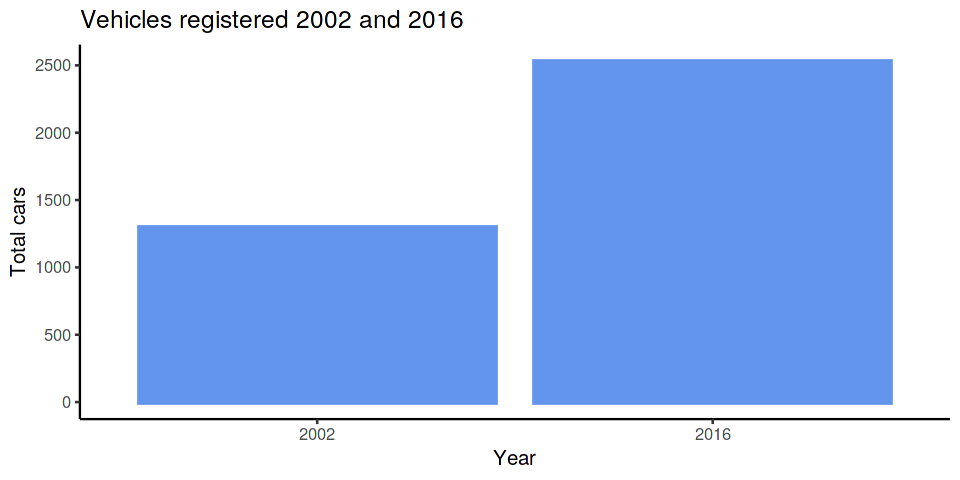

In [9]:
car_data %>%
  ggplot(aes(x = YearRegistered))+
  geom_bar(colour = "cornflowerblue",
           fill = "cornflowerblue",
           size = 1)+
  labs(title = "Vehicles registered 2002 and 2016",
       x = "Year",
       y = "Total cars")+
  clean_theme

## Comparing total count of groups within groups - Bar charts 2
We may want to compare differences between the total number of different types of vehicle released in each of the years.  
This is the same code as above but a few important additions:
1) In **ggplot()**, set the **colour =** and **fill =** options to **categorical variable 2**
2) In **geom_bar()**, set the **position =** option to **"dodge"**

```
dataset %>%
    ggplot(aes(x = categorical variable 1, colour = categorical variable 2, fill = categorical variable 2))+
    geom_bar(position = "dodge",
             options)+
    more_options
```

## **Exercise 5**
Visualise a comparison between the total number of different types of engine in 2002 and 2006

## **Question**
1) Which engine type shows the biggest increase in total registered from 2002 to 2006?
2) Do any engine types become less popular in 2016?

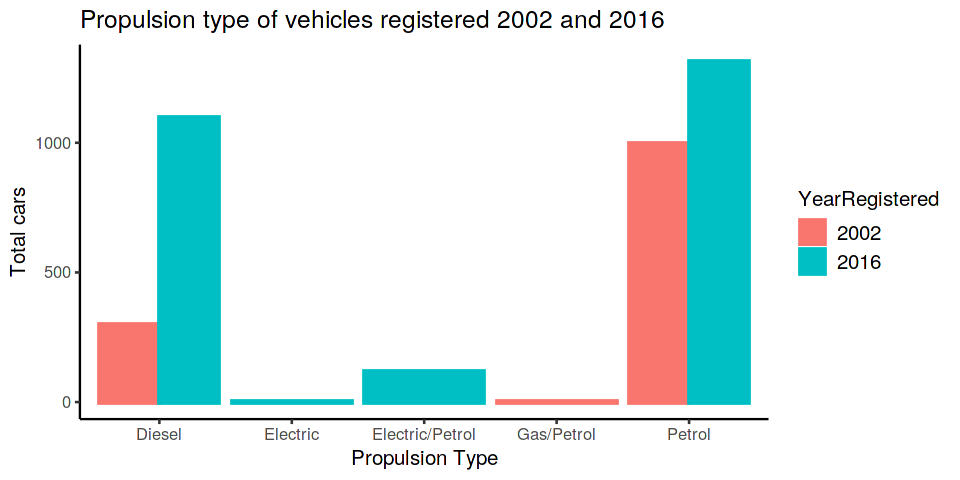

In [10]:
car_data %>%
  ggplot(aes(x = PropulsionTypeId, colour = YearRegistered, fill = YearRegistered))+
  geom_bar(size = 1,
           position="dodge")+
  labs(title = "Propulsion type of vehicles registered 2002 and 2016",
       x = "Propulsion Type",
       y = "Total cars")+
  clean_theme

## Visualising proportions - Tables
Sometimes we prefer to look at proportions rather than total counts.  
To do this we need to transform the data to a proportion measure that we can include in a pie chart.  
1) Start a new dataset by writing a **name** followed by **<-**
2) Feed the original **dataset** to the **group_by()** function using **%>%**
3) Specify a **categorical variable** to **group_by()** whose proportions you wish to visualise.
4) Feed this to the **summarise()** function using **%>%**
5) Set the **total = n()**. This will count the total number of observations in each group.
6) Feed this to the **mutate()** function using **%>%**
7) Set the **proportion = total/sum(total)**. This will divide the number of observations in each group by the total number of observations.
```
name_data <-
  dataset %>%
  group_by(variable) %>%
  summarise(total = n()) %>%
  mutate(proportion = (total/sum(total))
```
Finally we can print our new dataset using:
```
name_data %>%
    print()
```
#### **Exercise 6**
Create a new dataset called **proportion_data** which shows the proportion of cars registered in 2002 and 2016.  
**print()** your new dataset to view the proportions

In [28]:
proportion_data <-
    car_data %>%
      group_by(YearRegistered) %>%
      summarise(total = n()) %>%
      mutate(proportion = total/sum(total))

proportion_data %>%
    print()


# A tibble: 2 x 3
  YearRegistered total proportion
  <fct>          <int>      <dbl>
1 2002            1299      0.339
2 2016            2528      0.661


### Visualising proportions - pie charts  
Now you have your proportion data, you can use it to plot a pie chart:
1) Feed your **proportion_dataset** to the **ggplot()** function using **%>%**
2) Set the **y =** axis to your **proportion** measure and **fill =** to your **variable**
3) Add (**+**) the **geom_col()** function
4) Add (**+**) the **coord_polar()** function
5) Finally add any options that make the plot prettier

```
proportion_dataset %>%
  ggplot(aes(x = "", y = proportion, fill = variable))+
  geom_col(options)+
  coord_polar(options)+
  more_options
```
#### **Exercise 7**
Plot a pie chart from your data in **Exercise 6** using the code below

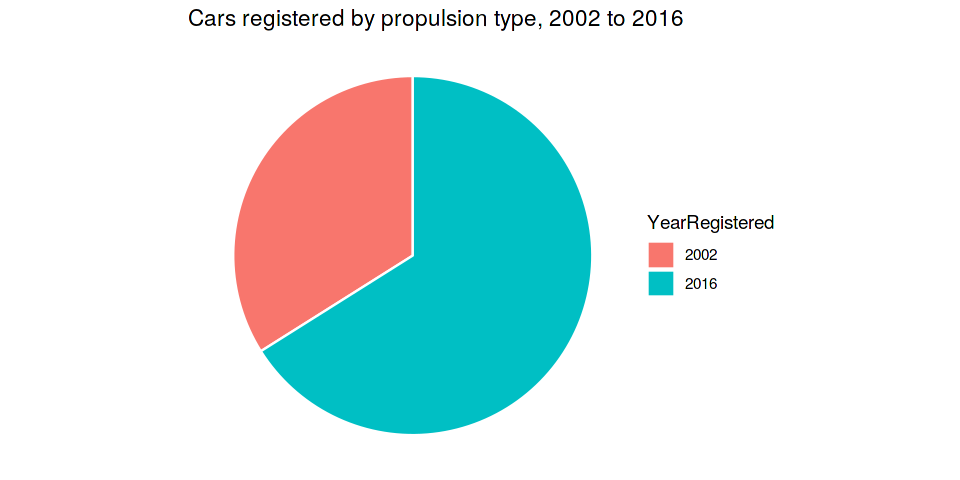

In [29]:
proportion_data %>%
  ggplot(aes(x = "", y = proportion, fill = YearRegistered))+
  geom_col(colour = "white",
           width = 1)+
  coord_polar("y", start = 0)+
  labs(title = "Cars registered by propulsion type, 2002 to 2016")+
  clean_theme +
  theme_void()

## Comparing proportion of groups within groups - Tables  
We know that more cars were bought in 2016. Therefore, comparing *total counts* of engine types between years like in **Exercise 5** may be misleading.  
Perhaps a better way to make comparisons would be to compare the *proportion* of different engine types registered each year.  
Once again we must construct a new dataset that contains proportion data.  
This is the same as before but we add one more variable to the **group_by()** function to give two categorical variables.  
**Categorical variable 1** is the variable you are comparing between (i.e. year).  
**Categorical variable 2** is the variable whose proportions you wish to compare (i.e. engine type). 

```
name_data <-
  dataset %>%
  group_by(categorical variable 1, categorical variable 2) %>%
  summarise(total = n()) %>%
  mutate(proportion = (total/sum(total))
```
Finally we can print our new dataset using:
```
name_data %>%
    print()
```
#### **Exercise 8**
Create a new dataset called **proportion_data** which shows the proportion of different engine types registered in 2002 and 2016.  
(*hint: make sure the variables go into **group_by()** in the right order*)

In [31]:
proportion_data <-
  car_data %>%
  group_by(YearRegistered, PropulsionTypeId) %>%
  summarise(total = n()) %>%
  mutate(proportion = (total/sum(total)))

proportion_data %>%
print()

# A tibble: 7 x 4
# Groups:   YearRegistered [2]
  YearRegistered PropulsionTypeId total proportion
  <fct>          <fct>            <int>      <dbl>
1 2002           Diesel             300   0.231   
2 2002           Gas/Petrol           1   0.000770
3 2002           Petrol             998   0.768   
4 2016           Diesel            1096   0.434   
5 2016           Electric             1   0.000396
6 2016           Electric/Petrol    118   0.0467  
7 2016           Petrol            1313   0.519   


## Comparing proportion of groups within groups - Pie Charts  
Now we have our proportion data, we can compare them in two pie charts.  
This is identical to **Exercise 7** but we add one more line of code.  
We add (**+**) the **grid_wrap()** function below **coord_polar()**
Inside **grid_wrap** we provide the argument **vars(categorical variable 1)**. This tells *R* that we want to display a pie chart for each group within this variable.

```
proportion_dataset %>%
  ggplot(aes(x = "", y = proportion, fill = categorical variable 2))+
  geom_col(options)+
  coord_polar(options)+
  grid_wrap(vars(categorical variable1))+  #NEW LINE OF CODE
  more_options
```

#### **Exercise 9**  
Plot two pie charts comparing the proportion of each engine type registered in 2002 and 2006  
(*hint: remember to put the variables in the correct order!*)

#### **Questions**
Which engine type(s) improve in popularity in 2016?  
Do any engine types become less popular in 2016?  
Have any of your answers from **Exercise 5** changed? Why or why not?  

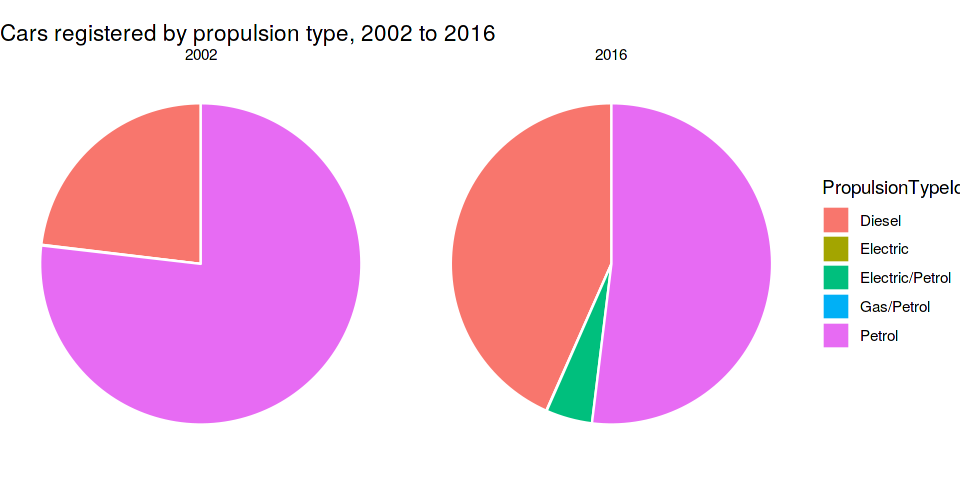

In [32]:
proportion_data %>%
  ggplot(aes(x = "", y = proportion, fill = PropulsionTypeId))+
  geom_col(colour = "white",
           width = 1)+
  coord_polar("y", start = 0)+
  labs(title = "Cars registered by propulsion type, 2002 to 2016")+
  facet_wrap(vars(YearRegistered))+
  clean_theme +
  theme_void()

#### **Optional Exercise**  
How do registered keeper identities change between 2002 and 2016?  
a) Construct a bar chart comparing total counts between 2002 and 2016  
b) Construct a pie chart comparing proportions between 2002 and 2016  
Does this help to explain why more cars were bought in 2016?

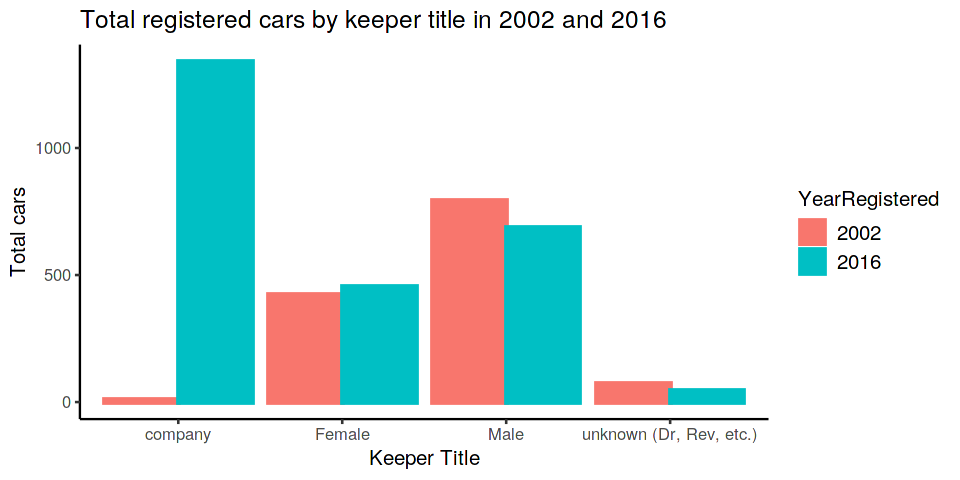

In [33]:
car_data %>%
  ggplot(aes(x = KeeperTitleId, colour = YearRegistered, fill = YearRegistered))+
  geom_bar(size = 1,
           position="dodge")+
  labs(title = "Total registered cars by keeper title in 2002 and 2016",
       x = "Keeper Title",
       y = "Total cars")+
  clean_theme

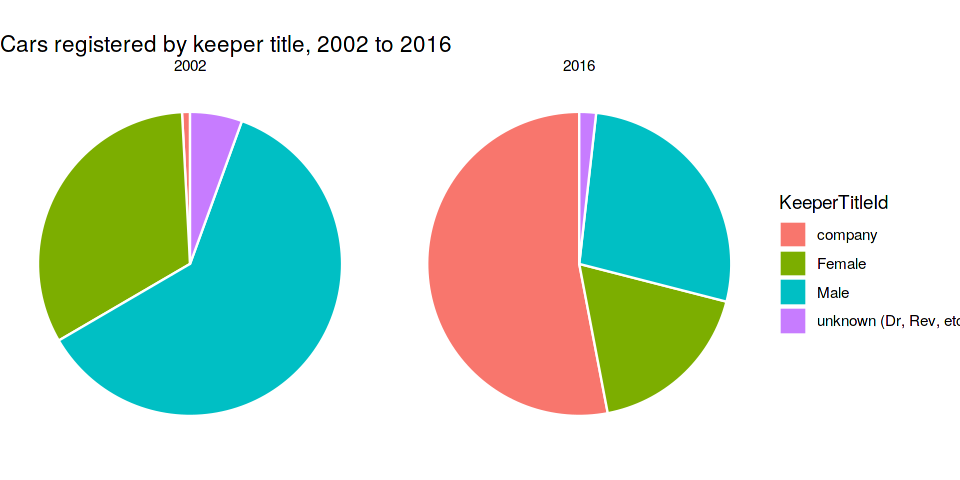

In [42]:
proportion_data <- car_data %>%
  group_by(YearRegistered, KeeperTitleId) %>%
  summarise(total = n()) %>%
  mutate(proportion = total/sum(total))

proportion_data %>%
  ggplot(aes(x = "", y = proportion, fill = KeeperTitleId))+
  geom_col(colour = "white",
           width = 1)+
  coord_polar("y", start = 0)+
  labs(title = "Cars registered by keeper title, 2002 to 2016",
       x = "Keeper title",
       y = "Total cars")+
  facet_wrap(vars(YearRegistered))+
  clean_theme +
  theme_void()